In [6]:
import numpy as np
import pylab as plt
import os
import scipy.integrate
print(os.getcwd())

/home/wester/Privat/projects/corona/JupyterLab/SEIR


# SEIR Model

* N - total number
* S - susceptible
* E - exposed
* I - infectious
* R - recovered

$\dfrac{dS(t)}{dt} = - \dfrac{R_t}{T_{inf}} I(t) \dfrac{S(t)}{N}$

$\dfrac{dE(t)}{dt} = \dfrac{R_t}{T_{inf}} I(t) \dfrac{S(t)}{N} - \dfrac{1}{T_{inc}} E(t-t_{lag})$ 

$\dfrac{dI(t)}{dt} = \dfrac{1}{T_{inc}} E(t-t_{lag}) - \dfrac{1}{T_{inf}} I(t)$ 

$\dfrac{dR(t)}{dt} = \dfrac{1}{T_{inf}} I(t)$

* $R_t$ - base reproduction rate = 2.3
* $T_{inc}$ - incubation period = 5 days
* $T_{inf}$ - infectious period = 2.5 days

[Epidemic calculator](https://gabgoh.github.io/COVID/index.html?CFR=0.02&D_hospital_lag=5&D_incbation=5.2&D_infectious=2.9&D_recovery_mild=11.1&D_recovery_severe=28.6&I0=1&InterventionAmt=1&InterventionTime=100&P_SEVERE=0.2&R0=2.2&Time_to_death=32&logN=15.761420707019587)

[SEIR Model Wikipedia](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology)

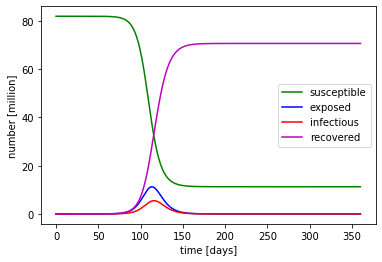

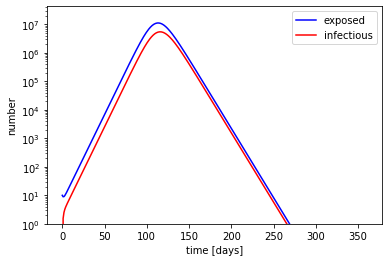

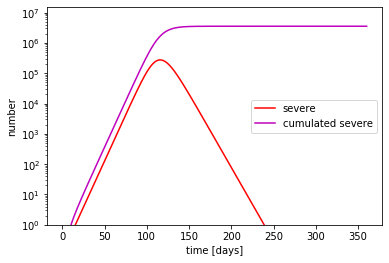

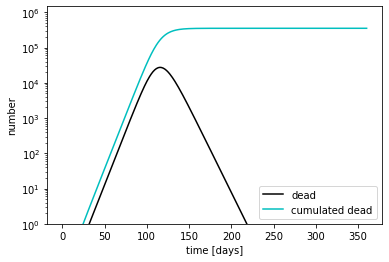

In [24]:
def seir(y, t, Rt, Tinc, Tinf, N):
    a = Rt/Tinf/N
    dydt = np.zeros(4)
    dydt[0] =  -a * y[0] * y[2]
    dydt[1] =   a * y[0] * y[2] - y[1] / Tinc
    dydt[2] =                     y[1] / Tinc - y[2] / Tinf
    dydt[3] =                                   y[2] / Tinf  
    return dydt

def plot(y, t, percent_severe = 5.0e-2, percent_fatal = 5.0e-3):
    c = 1.0e-6
    S = y[:,0]
    E = y[:,1]
    I = y[:,2]
    R = y[:,3]
    plt.plot(t, S*c, 'g', label="susceptible")
    plt.plot(t, E*c, 'b', label="exposed")
    plt.plot(t, I*c, 'r', label="infectious")
    plt.plot(t, R*c, 'm', label="recovered")
    plt.xlabel("time [days]")
    plt.ylabel("number [million]")
    plt.legend(loc = 'best')

    plt.figure()
    plt.semilogy(t, E, 'b', label="exposed")
    plt.semilogy(t, I, 'r', label="infectious")
    plt.xlabel("time [days]")
    plt.ylabel("number")
    plt.legend(loc = 'best')
    plt.axis([None, None, 1.0, None])

    plt.figure()
    plt.semilogy(t, I * percent_severe, 'r', label="severe")
    plt.semilogy(t, R * percent_severe, 'm', label="cumulated severe")
    plt.xlabel("time [days]")
    plt.ylabel("number")
    plt.legend(loc = 'best')
    plt.axis([None, None, 1.0, None])

    plt.figure()
    plt.semilogy(t, I * percent_fatal, 'k', label="dead")
    plt.semilogy(t, R * percent_fatal, 'c', label="cumulated dead")
    plt.xlabel("time [days]")
    plt.ylabel("number")
    plt.legend(loc = 'best')
    plt.axis([None, None, 1.0, None])

    plt.show()
    
Rt   = 2.3
Tinc = 5.0
Tinf = 2.5
N    = 8.2e7

tmax = 360.0
y0 = np.array([N, 10.0, 0.0, 0.0])
t  = np.mgrid[0.0:tmax:360j]
args = (Rt, Tinc, Tinf, N)

y = scipy.integrate.odeint(seir, y0, t, args=(Rt, Tinc, Tinf, N))
plot(y, t, percent_severe = 5.0e-2, percent_fatal = 5.0e-3)